<h3>Importing libraries</h3>


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings


<h3>Looking at the Dataset</h3>

In [2]:
data = pd.read_csv('Twitter_kaggle.csv',encoding='latin-1')

data.head()

#data[['user_id','time','username','tweet']]

,output,user_id,time,username,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [3]:
tweet = data.columns.values[0]
sentiment = data.columns.values[4]
tweet, sentiment

('output', 'tweet')

<h3>Looking at information of the dataset(columns, their datatypes, null values in the columns,)</h3>




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   output    1048575 non-null  int64 
 1   user_id   1048575 non-null  int64 
 2   time      1048575 non-null  object
 3   username  1048575 non-null  object
 4   tweet     1048575 non-null  object
dtypes: int64(2), object(3)
memory usage: 40.0+ MB


 <h3>Checking for null values if any</h3>

In [5]:
data.isnull().any()

output      False
user_id     False
time        False
username    False
tweet       False
dtype: bool

<h3>Count of positive Vs negative tweets</h3>

In [6]:
#counts positive and negative tweets

tweet_count  = data['output'].value_counts()
print(tweet_count)


0    799999
4    248576
Name: output, dtype: int64


C:\Users\ayush_dwivedi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


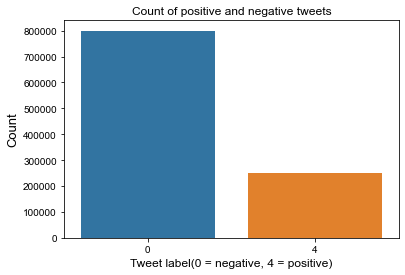

In [7]:
#barplot of positive vs negative tweets

plt.figure(figsize=(6,4))
sns.barplot(tweet_count.index, tweet_count.values)
sns.set_style("darkgrid")
plt.title('Count of positive and negative tweets')
plt.ylabel('Count', fontsize=13)
plt.xlabel('Tweet label(0 = negative, 4 = positive)', fontsize=12)
plt.show()


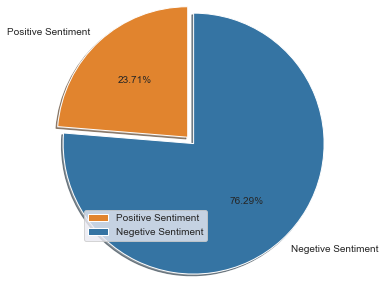

In [9]:
#piechart of positive vs negative tweets percentage

sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(data['output'] != 0).sum(), (data['output'] == 0).sum()] 
colors = ['#e1842e', '#3574a3']
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()


<h3>Distribution of length of tweets</h3>


Text(0.5, 0, 'Number of Characters')

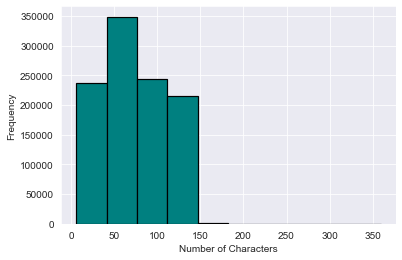

In [10]:
# checking the distribution of length of tweets in the data

length_train = data['tweet'].str.len().plot.hist(color = 'teal', figsize = (6, 4), edgecolor='black', linewidth=1.2)
plt.xlabel('Number of Characters')


<h3>Grouping by mean of lengths and user_id</h3>

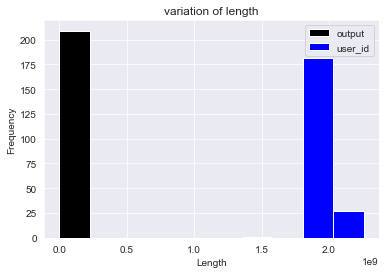

In [11]:
data['len'] = data['tweet'].str.len()

data.groupby('len').mean().plot.hist(color = ['black', 'blue'], figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()


<h3> Top 30 Most and Least Frequently occurring words</h3>

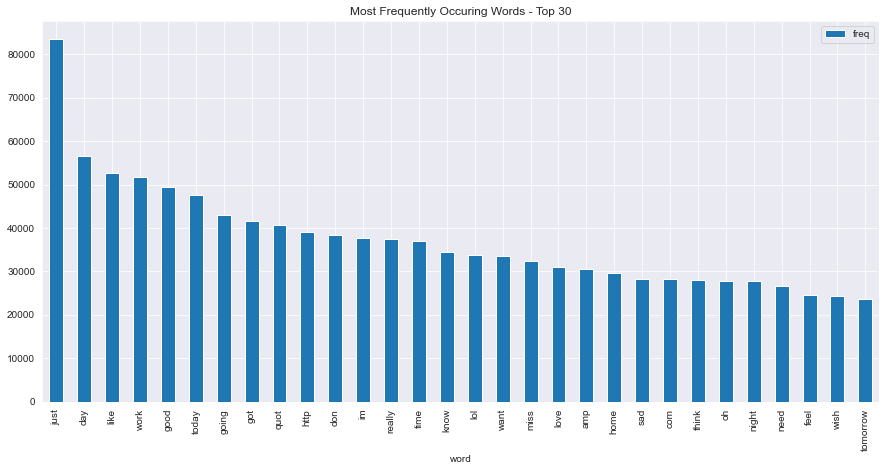

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#applying stop words

cv = CountVectorizer(stop_words = 'english')  
words = cv.fit_transform(data.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()


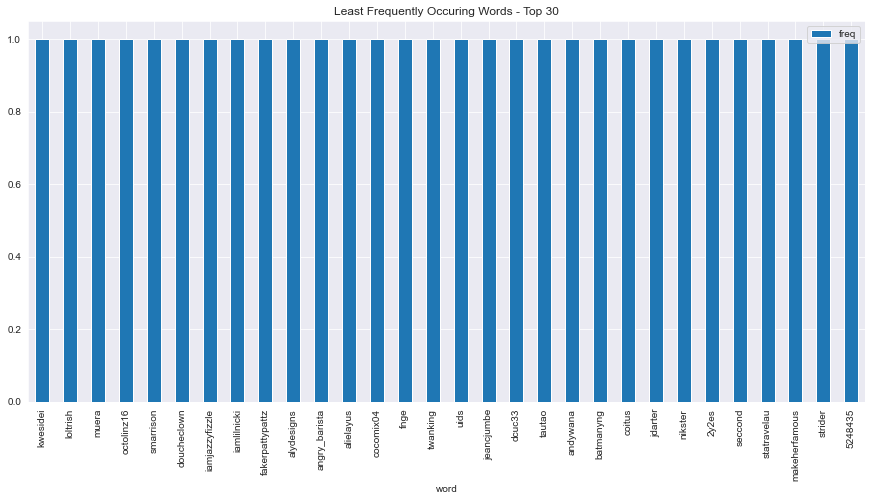

In [15]:
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1])

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Least Frequently Occuring Words - Top 30")
plt.show()


<H3>Tweets in months of the year 2009</h3>

Text(0.5, 1.0, 'Tweets during each months of 2009')

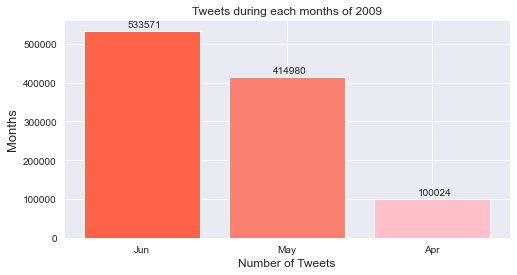

In [11]:
#Date is an important feature if I wish to take a look at the tweets based on dates. 
#We'll extract the month from each tweet and then plot the count of tweets for each month.
#Dataset consists of tweets of only these 3 months

data['Month'] = data['time'].apply(lambda date: date.split(' ')[1])
months_count = data['Month'].value_counts()

plt.figure(figsize = (8, 4))
plt.bar([ 'Jun','May', 'Apr'], months_count.values, color = ['tomato','salmon', 'pink'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.ylabel('Months', fontsize=13)
plt.xlabel('Number of Tweets', fontsize=12)
#plt.xlabel('Months')
#plt.ylabel('Number of tweets')
plt.title('Tweets during each months of 2009')

<h3>Collecting Hashtags</h3>

In [212]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [213]:
import re

# extracting hashtags from positive tweets
HT_regular = hashtag_extract(data['tweet'][data['output'] == 4])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(data['tweet'][data['output'] == 0])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

<h3>Extracting Hashtags from Positive Tweets</h3>

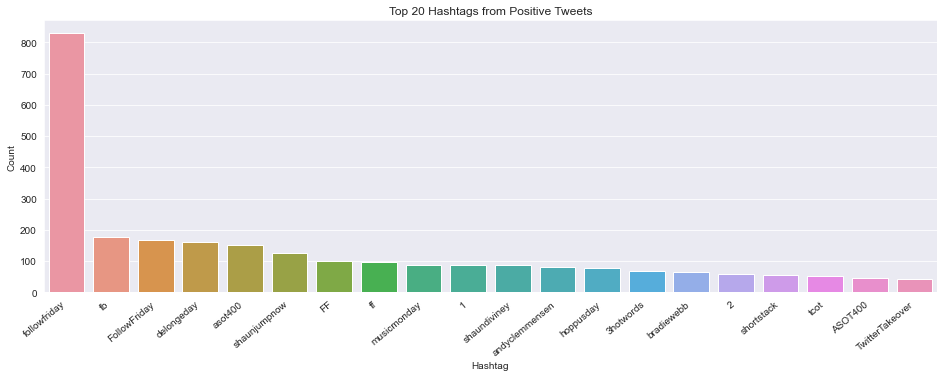

In [214]:
import nltk

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.title('Top 20 Hashtags from Positive Tweets')
plt.show()

<h3>Extracting Hashtags from Negative Tweets</h3>

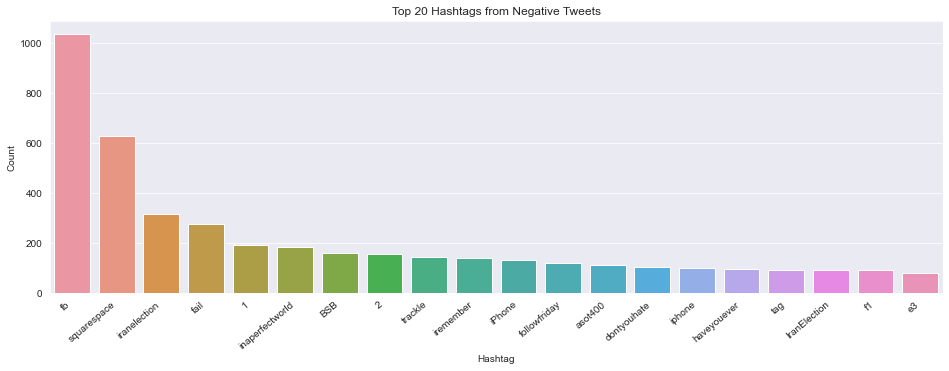

In [215]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.title('Top 20 Hashtags from Negative Tweets')
plt.show()


<h3>Tokenizing and creating Word to Vector Model</h3>

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            #size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['tweet']), epochs=20)

<h3>Looking at similar words</h3>

In [21]:
model_w2v.wv.most_similar(positive = "Thanks")

[('thanks', 0.881918728351593),
 ('thx', 0.7779269218444824),
 ('Thx', 0.75938481092453),
 ('recommendation,', 0.7366681694984436),
 ('mention!', 0.726130485534668),
 ('recommendation!', 0.7162981629371643),
 ('Thank', 0.707209587097168),
 ('Th*nks', 0.6982640027999878),
 ('Thanx', 0.6918596029281616),
 ('follow!', 0.6856449842453003)]

In [22]:
model_w2v.wv.most_similar(positive = "Hope")

[('hope', 0.871922492980957),
 ('Hopefully', 0.7471175193786621),
 ('Glad', 0.7465533018112183),
 ('Hoping', 0.710760235786438),
 ('Hopes', 0.6177619099617004),
 ('hopefully', 0.6077755093574524),
 ('that...hope', 0.6019923090934753),
 ('(((HUGS)))', 0.5867412686347961),
 ('hydrated.', 0.5812854766845703),
 ('glad', 0.5797682404518127)]

In [23]:
model_w2v.wv.most_similar(negative = "stupid")

[('Misunderstood', 0.2409691959619522),
 ('@lindabot', 0.2107611447572708),
 ('Nosebleed.', 0.15877193212509155),
 ('headacheeeeee', 0.15727408230304718),
 ('@kmarshpwnsface', 0.13826406002044678),
 ('@riqfreire', 0.12109021097421646),
 ('@badpaintings', 0.10287147015333176),
 ('@iliveforthis', 0.06201530620455742),
 ('Headacheeeee', 0.05958682298660278),
 ('MULTIPLY', 0.05820206552743912)]

<h3>Importing Contractions</h3>

In [12]:
#importing the Contractions
import json

with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']


<h3>Handling emoji classifications</h3>


In [13]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet


<h3>Preprocessing Tweets</h3>


In [14]:
# Define a function which will preprocess the tweets

import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [15]:
data['processed_tweet'] = np.vectorize(process_tweet)(data['tweet'])

<h3>Looking at Processed Vs Unprocessed Tweets

In [16]:
# Comparing processed vs Unprocessed data

data.head(10)

,output,user_id,time,username,tweet,len,processed_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,111,is upset that he can update his facebook by te...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,89,dived many times for the ball managed to save...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",111,no it not behaving at all mad why am here bec...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,29,not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug,11,need hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,99,hey long time no see yes rains bit only bit l...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it,36,nope they didn have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?,25,que me muera
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,erinx3leannexo,spring break in plain city... it's snowing,43,spring break in plain city it snowing


<h3>Tokenization</h3>

In [17]:
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [is, upset, that, he, can, update, his, facebo...
1    [dived, many, times, for, the, ball, managed, ...
2    [my, whole, body, feels, itchy, and, like, its...
3    [no, it, not, behaving, at, all, mad, why, am,...
4                              [not, the, whole, crew]
Name: processed_tweet, dtype: object

<h3>Stemming</h3>

In [25]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()


0    [is, upset, that, he, can, updat, hi, facebook...
1    [dive, mani, time, for, the, ball, manag, to, ...
2    [my, whole, bodi, feel, itchi, and, like, it, ...
3    [no, it, not, behav, at, all, mad, whi, am, he...
4                              [not, the, whole, crew]
Name: processed_tweet, dtype: object

<h3>Stop Words</h3>

In [26]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
             "you", "your", "yours", "yourself", "yourselves", "he", "him",
             "his", "himself", "she", "her", "hers", "herself", "it", "its",
             "itself", "they", "them", "their", "theirs", "themselves", "what",
             "which", "who", "whom", "this", "that", "these", "those", "am", "is",
             "are", "was", "were", "be", "been", "being", "have", "has", "had",
             "having", "do", "does", "did", "doing", "a", "an", "the", "and",
             "but", "if", "or", "because", "as", "until", "while", "of", "at",
             "by", "for", "with", "about", "against", "between", "into", "through",
             "during", "before", "after", "above", "below", "to", "from", "up",
             "down", "in", "out", "on", "off", "over", "under", "again", "further",
             "then", "once", "here", "there", "when", "where", "why", "how", "all",
             "any", "both", "each", "few", "more", "most", "other", "some", "such",
             "only", "own", "same", "so", "than", "too", "very",
             "can", "will", "just", "should", "now"}

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words, nltk.corpus.stopwords.words('english')

<h3>Word Cloud of Positive and Negative Tweets</h3>


<Figure size 3600x2400 with 0 Axes>

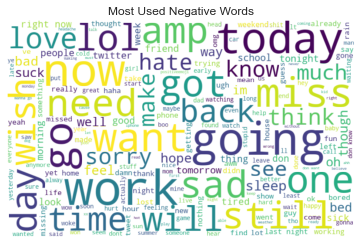

In [26]:
# word cloud negative tweets

from wordcloud import WordCloud 

negative_words =' '.join([text for text in data['processed_tweet'][data['output'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negative Words")
plt.savefig('negative_words.png')
plt.show()

<Figure size 3600x2400 with 0 Axes>

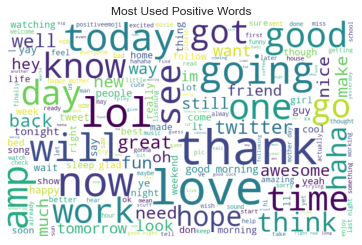

In [27]:
# word cloud positive tweets

positive_words =' '.join([text for text in data['processed_tweet'][data['output'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('positive_words.png')
plt.show()

<h3>Getting number of unique users</h3>

In [223]:
#Total number of unique users

data['username'].count()
data['user_id'].count()

1048575

<h3>Tweets per each user</h3>

In [224]:
#Tweets generated per user

data['username'].value_counts()

lost_dog           549
tweetpet           310
webwoke            264
mcraddictal        238
wowlew             210
                  ... 
MizzLanea            1
bigbizkit            1
FaceofFOXToledo      1
FannyPhil            1
AirJear              1
Name: username, Length: 511366, dtype: int64

<h3>Sentiment associated with the user last_dog and their tweets</h3>

In [30]:
#Sentiment assigned to the user lost_dog

data_filter = data[data['username'] == 'lost_dog']
data_filter['output'].value_counts()

0    549
Name: output, dtype: int64

In [31]:
#Tweets of the user last_dog

data_filter['tweet'].head(549)

43934     @NyleW I am lost. Please help me find a good h...
45573     @SallyD I am lost. Please help me find a good ...
46918     @zuppaholic I am lost. Please help me find a g...
47948     @LOSTPETUSA I am lost. Please help me find a g...
50571     @JeanLevertHood I am lost. Please help me find...
                                ...                        
792408    @trooppetrie I am lost. Please help me find a ...
793313    @Carly_FTS I am lost. Please help me find a go...
793609    @inathlone I am lost. Please help me find a go...
798607    @Kram I am lost. Please help me find a good ho...
799404    @W_Hancock I am lost. Please help me find a go...
Name: tweet, Length: 549, dtype: object

<h3>Sentiment associated with the user tweetpet and their tweets</h3>

In [32]:
#Sentiment assigned to the user tweetpet

data_filter = data[data['username'] == 'tweetpet']
data_filter['output'].value_counts()

0    310
Name: output, dtype: int64

In [33]:
#Tweets of the user tweetpet

data_filter['tweet'].head(310)

9559                             @tweetchild  Clean Me!
9560                             @tweetchild  Clean Me!
9561                            @chromachris  Clean Me!
9563                                @reatlas  Clean Me!
9564                            @chromachris  Clean Me!
                              ...                      
49678                        @amateurdelta54  Clean Me!
49679                          @littleblue62  Clean Me!
49680                             @Shawn1976  Clean Me!
49693       @TKgFMb   hungry. Type 'feed' to feed me...
49694    @palfour89   hungry. Type 'feed' to feed me...
Name: tweet, Length: 310, dtype: object

<h3>Sentiment associated with the user webwoke and their tweets</h3>

In [34]:
#Sentiment assigned to the user webwoke

data_filter = data[data['username'] == 'webwoke']
data_filter['output'].value_counts()

0    264
Name: output, dtype: int64

In [35]:
#Tweets of the user webwoke

data_filter['tweet'].head(250)

363302                 auchh, drop by 1  (32)elitestv.com
366528                    auchh, drop by 1  (7)pedeee.com
366529                 auchh, drop by 1  (17)rumahabi.com
366596                  auchh, drop by 1  (18)twitter.com
366598                    auchh, drop by 1  (19)yehia.org
                               ...                       
452665           owww god, drop by 3  78. blogratings.com
452739              owww god, drop by 3  81. buzzfeed.com
452741            come on... drop by 3  82. blogmarks.net
452800               damn... drop by 8  84. seolithic.com
452802    damn... drop by 5  85. trytomakemoneyonline.com
Name: tweet, Length: 250, dtype: object

<h3>Users associated with negative tweets</h3>

In [36]:
#Users assigned with Negative Sentiment

data_filter_output = data[data['output'] == 0]
data_filter_output['username'].value_counts()

lost_dog         549
tweetpet         310
webwoke          264
mcraddictal      210
wowlew           210
                ... 
Sophiexx17         1
smirnoffs          1
soylady            1
njsavestheday      1
Eeoor              1
Name: username, Length: 415669, dtype: int64

<h3>Users associated with positive tweets</h3>

In [37]:
#Users assigned with Positive Sentiment

data_filter_output = data[data['output'] == 4]
data_filter_output['username'].value_counts()

tsarnick          148
Djalfy            114
ramdomthoughts     96
KevinEdwardsJr     95
iHomeTech          91
                 ... 
AVMan               1
MichaelBeyond       1
libbyabrego         1
simoneuno           1
swadke              1
Name: username, Length: 155245, dtype: int64

<h3>Count Vectorizer</h3>


In [18]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2), max_features = 250000)    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(data['processed_tweet'])  
final_vectorized_data


<1048575x250000 sparse matrix of type '<class 'numpy.int64'>'
	with 20058570 stored elements in Compressed Sparse Row format>

<h3>Splitting Data Into Training Set and Test Set</h3>


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data,data['output'],
                                                    test_size=0.2, random_state=69)


In [23]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (838860, 250000)
X_test_shape :  (209715, 250000)
y_train_shape :  (838860,)
y_test_shape :  (209715,)


<h3>Machine Learning Model: Naive Bayes</h3>


In [20]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

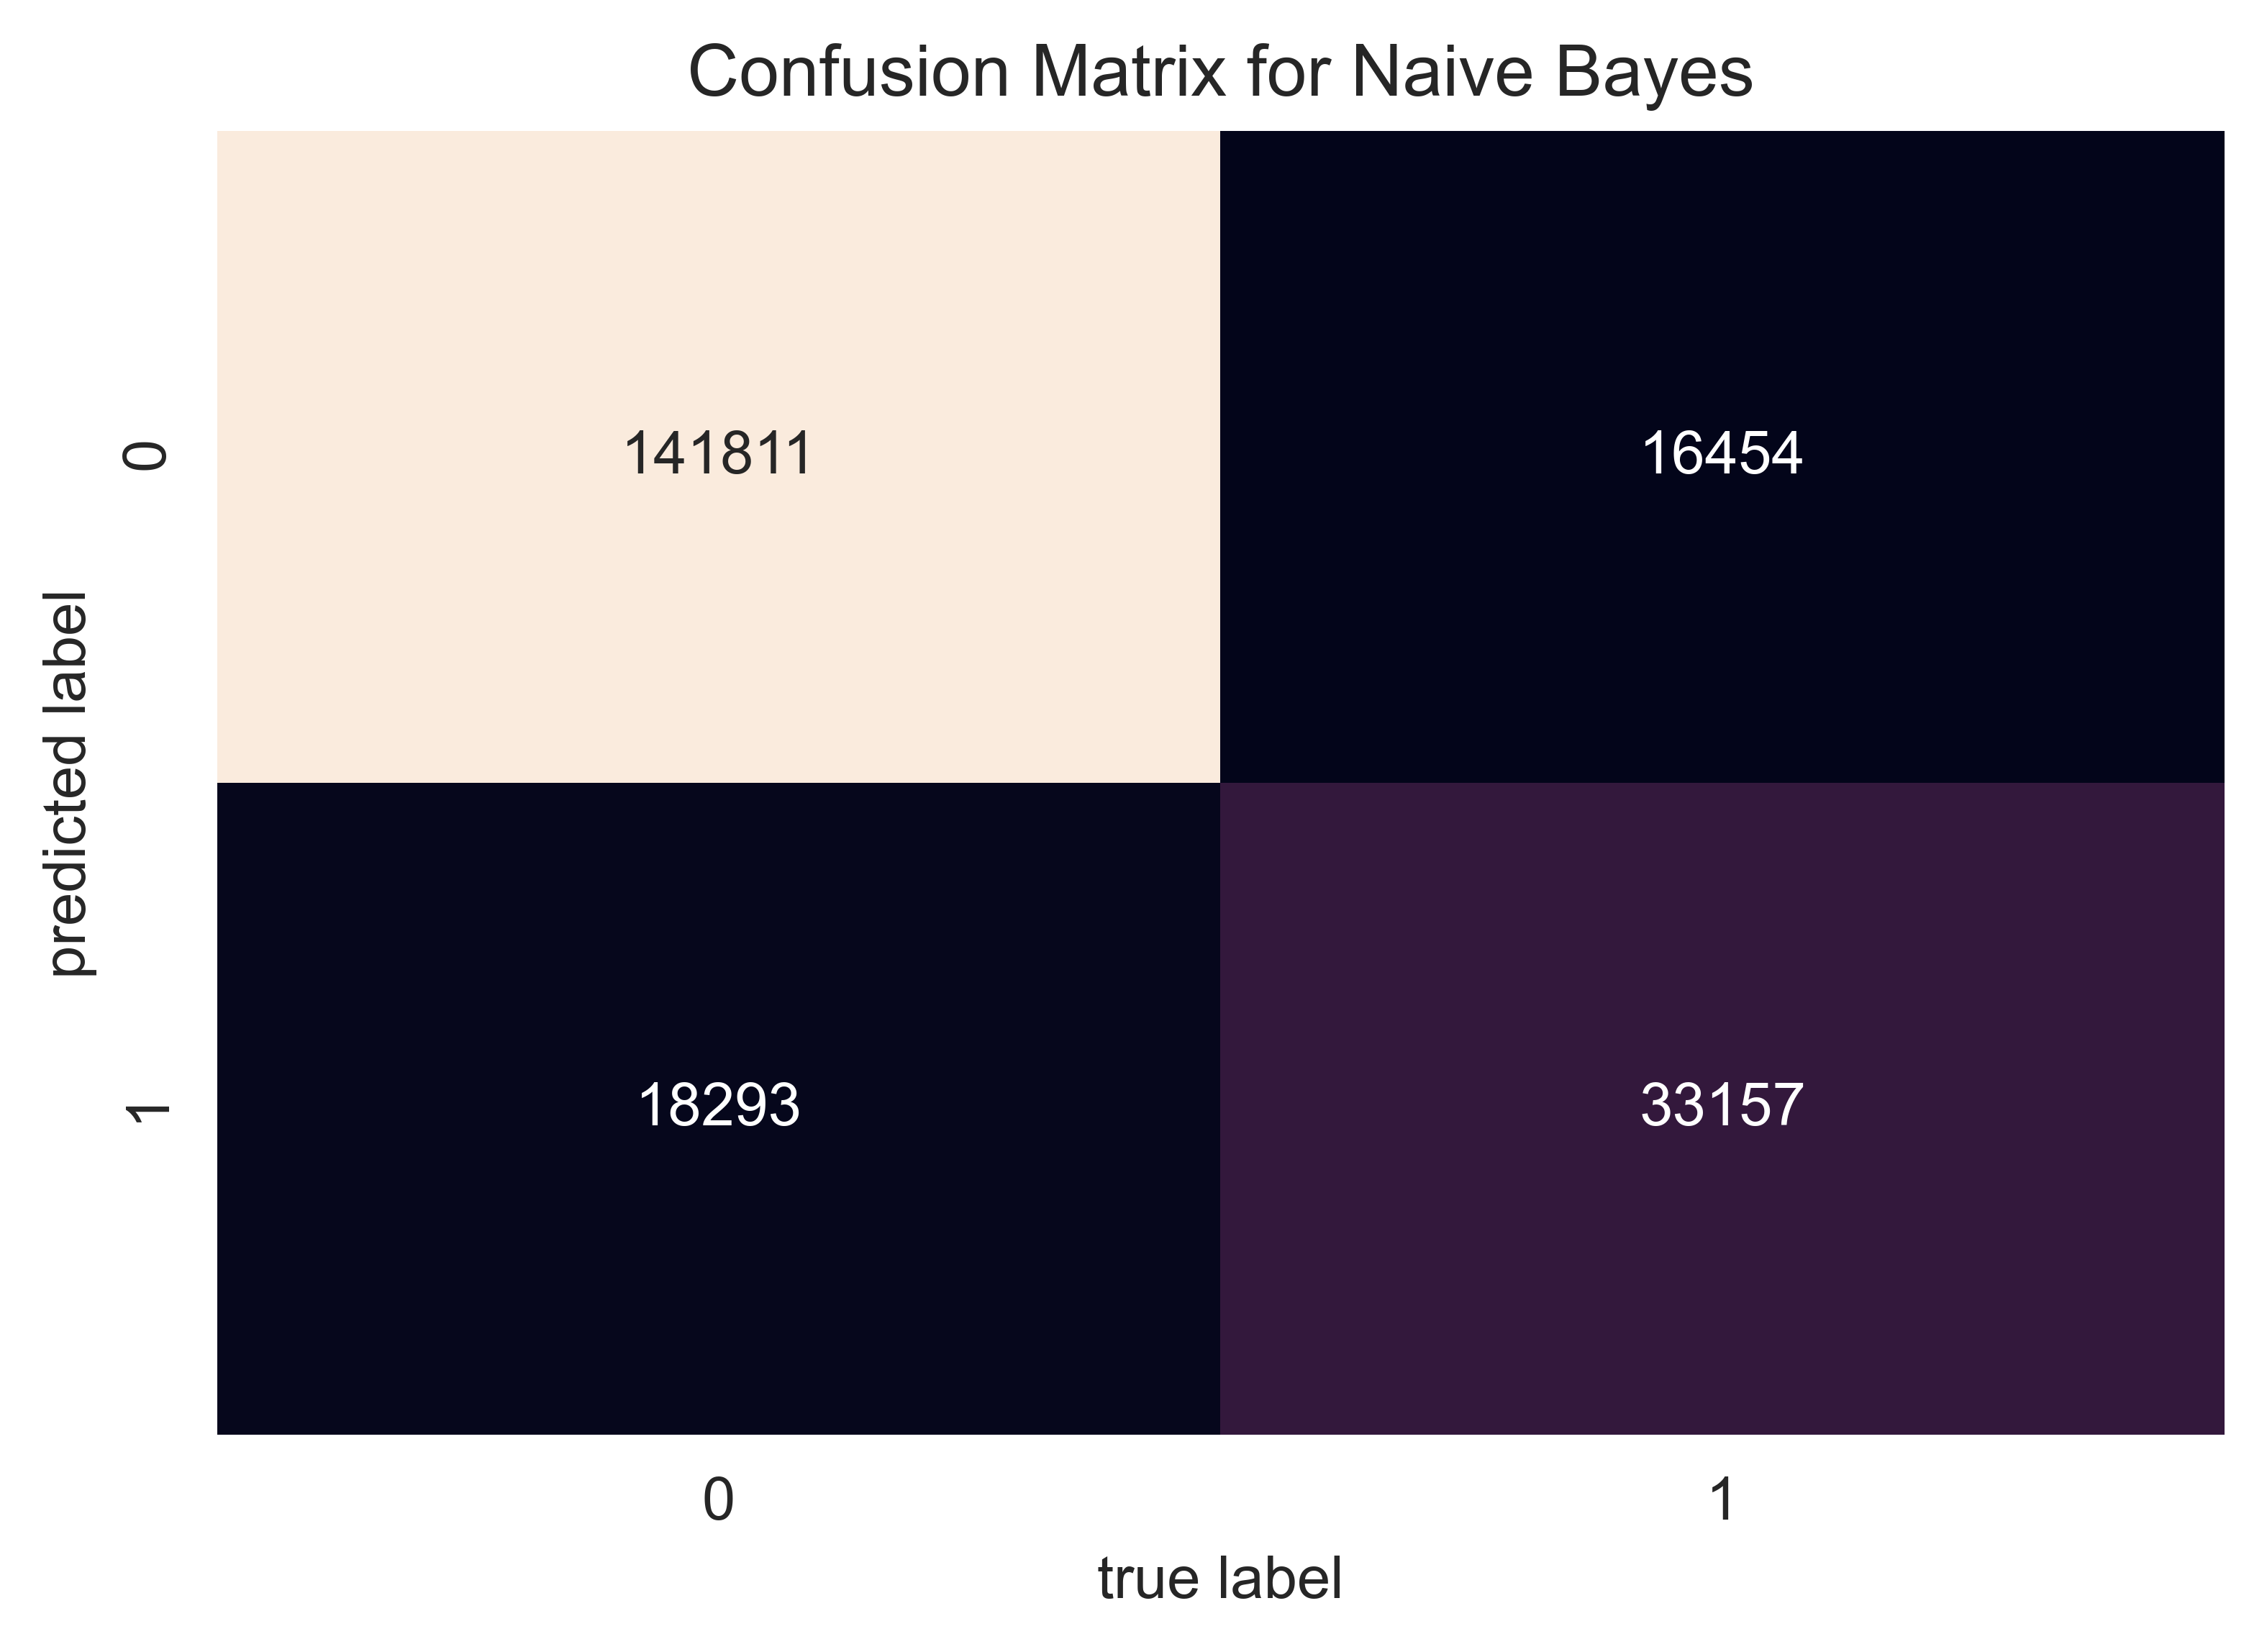

In [79]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [57]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8330400782013685


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89    160104
           4       0.64      0.67      0.66     49611

    accuracy                           0.83    209715
   macro avg       0.77      0.78      0.77    209715
weighted avg       0.84      0.83      0.84    209715



<h3>Machine Learning Model: Logistic Regression</h3>


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Validation Accuracy :", model.score(X_test, y_test))


C:\Users\ashvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9253010037431753
Validation Accuracy : 0.8565672460243664


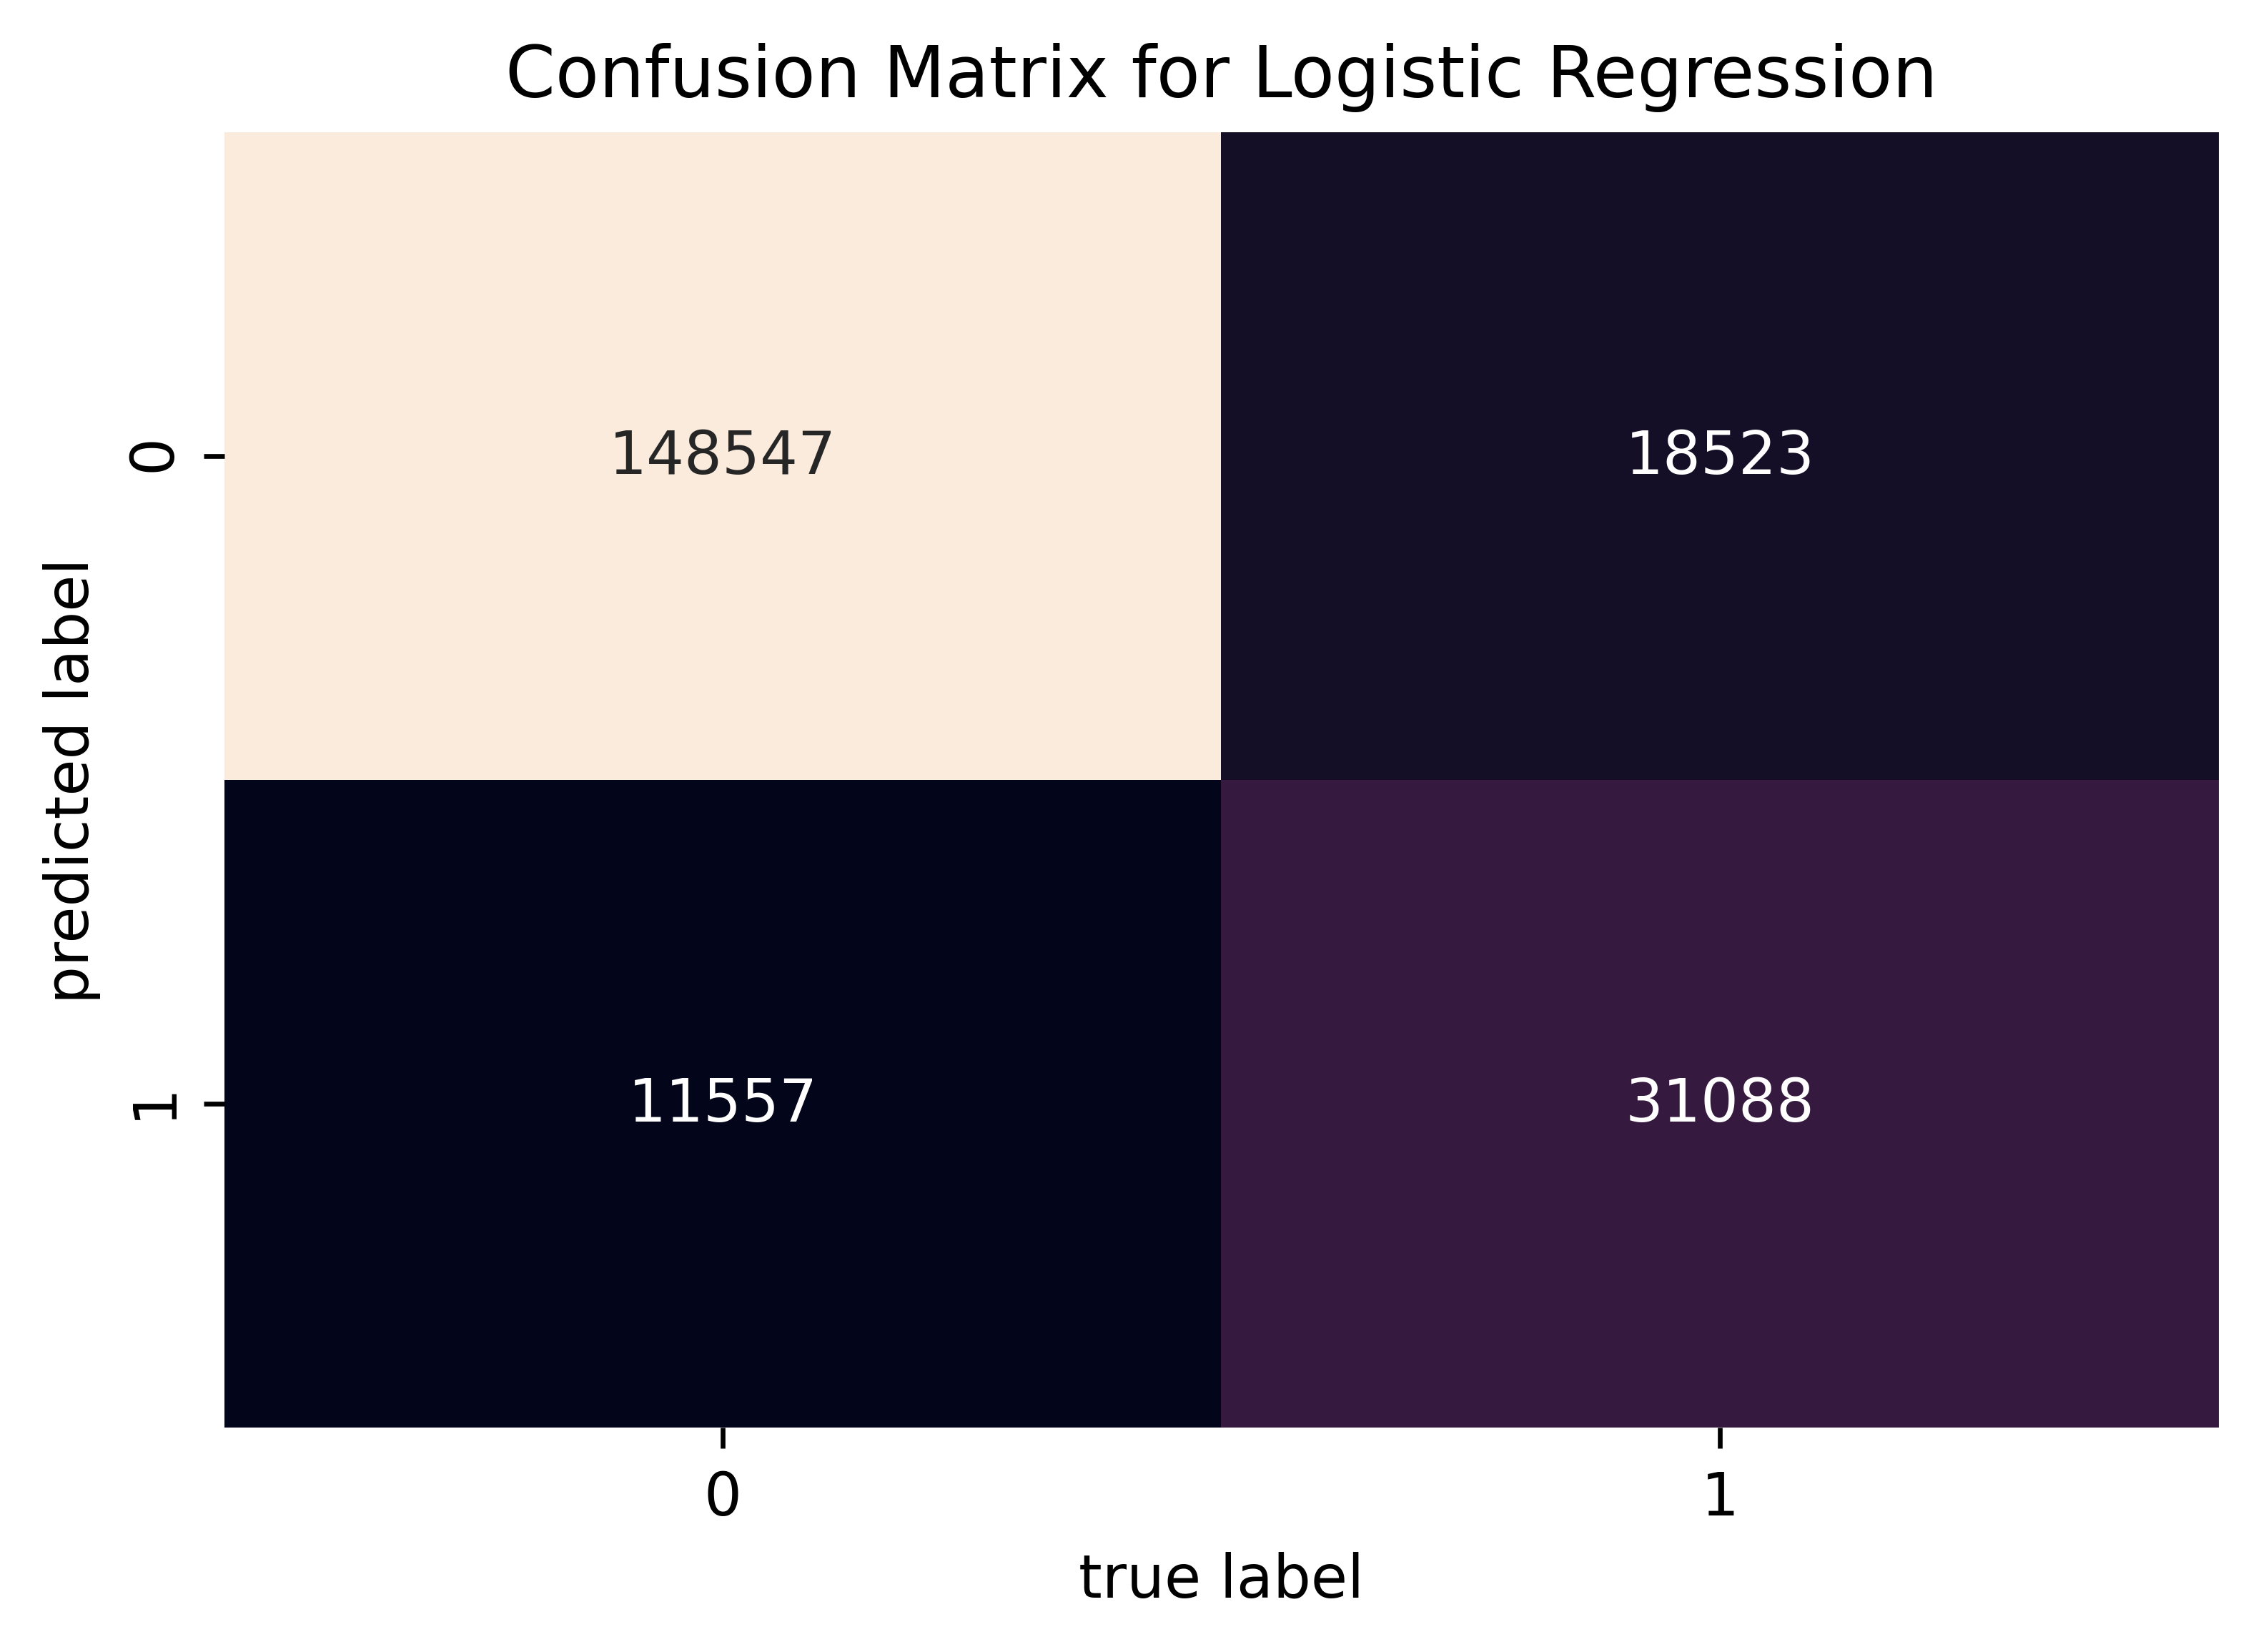

Accuracy with Logistic Regression:  0.8565672460243664
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    160104
           4       0.73      0.63      0.67     49611

    accuracy                           0.86    209715
   macro avg       0.81      0.78      0.79    209715
weighted avg       0.85      0.86      0.85    209715



In [44]:
plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()


from sklearn.metrics import accuracy_score

score_lr = accuracy_score(y_pred_lr, y_test)
print("Accuracy with Logistic Regression: ",score_lr)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

<h3>Importing libraries and connecting to Database</h3>

In [21]:
import pymysql
import pandas as pd
import numpy as np

In [22]:
#!pip install mysql
!pip install PyMySQL

In [120]:
import pymysql.cursors

# Connect to the database
connection_n = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='EMSE6992',
                             password='MySQLpass')
cur_n = connection.cursor()

<h3>Looking at number of tweets</h3>

In [53]:
res = cur.execute("Select * From proj_stats")
users = cur.fetchall()
print(res)

40865


<h3>Converting the Table to Pandas Dataframe</h3>

In [54]:
elon_tweets = pd.DataFrame.from_dict(users)
elon_tweets[:5]

,0,1,2,3,4,5,6,7,8,9
0,2018-05-25,113,1000021217993285632,en,4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Love this. https://t.co/ECYyqFbNTk,NaN,64488804,None
1,2018-05-25,1830,1000047804796977153,en,694,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Releasing Gym Retro — 1000+ games for reinforc...,1.0,4398626122,None
2,2018-05-25,0,1000049585266528256,en,20,"<a href=""http://twitter.com/download/android"" ...",RT @Fermilab: The Secret to Measuring an Antin...,NaN,49310901,None
3,2018-05-26,8,1000320595421290500,en,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I don't think this is supposed to happen @firs...,NaN,19159176,None
4,2018-05-26,18,1000371401931608066,en,1,"<a href=""http://twitter.com/download/iphone"" r...",Congrats to all the teams! https://t.co/GXprl0...,NaN,1024391197,None


<h3>Renaming the Columns</h3>

In [103]:
elon_tweets.columns = ['created_date', 'favorites_count', 'status_id', 'lang', 'retweet_count', 'source', 'tweet', 'truncated', 'user_id', 'sentiment']


In [104]:
elon_tweets[:5]

,created_date,favorites_count,status_id,lang,retweet_count,source,tweet,truncated,user_id,sentiment
0,2018-05-25,113,1000021217993285632,en,4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Love this. https://t.co/ECYyqFbNTk,NaN,64488804,None
1,2018-05-25,1830,1000047804796977153,en,694,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Releasing Gym Retro — 1000+ games for reinforc...,1.0,4398626122,None
2,2018-05-25,0,1000049585266528256,en,20,"<a href=""http://twitter.com/download/android"" ...",RT @Fermilab: The Secret to Measuring an Antin...,NaN,49310901,None
3,2018-05-26,8,1000320595421290500,en,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I don't think this is supposed to happen @firs...,NaN,19159176,None
4,2018-05-26,18,1000371401931608066,en,1,"<a href=""http://twitter.com/download/iphone"" r...",Congrats to all the teams! https://t.co/GXprl0...,NaN,1024391197,None


<h3>Looking at dataset information and checking for null values</h3>

In [28]:
elon_tweets.info()
elon_tweets.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40865 entries, 0 to 40864
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_date     40865 non-null  object 
 1   favorites_count  40865 non-null  int64  
 2   status_id        40865 non-null  object 
 3   lang             40865 non-null  object 
 4   retweet_count    40865 non-null  int64  
 5   source           40865 non-null  object 
 6   tweet            40865 non-null  object 
 7   truncated        9298 non-null   float64
 8   user_id          40865 non-null  object 
 9   sentiment        0 non-null      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.1+ MB


created_date       False
favorites_count    False
status_id          False
lang               False
retweet_count      False
source             False
tweet              False
truncated           True
user_id            False
sentiment           True
dtype: bool

<h3>Preprocessing tweets and making a column for it in the table

In [29]:
elon_tweets['processed_tweet'] = np.vectorize(process_tweet)(elon_tweets['tweet'])
elon_tweets.head()

,created_date,favorites_count,status_id,lang,retweet_count,source,tweet,truncated,user_id,sentiment,processed_tweet
0,2018-05-25,113,1000021217993285632,en,4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Love this. https://t.co/ECYyqFbNTk,NaN,64488804,None,love this
1,2018-05-25,1830,1000047804796977153,en,694,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Releasing Gym Retro — 1000+ games for reinforc...,1.0,4398626122,None,releasing gym retro games for reinforcement le...
2,2018-05-25,0,1000049585266528256,en,20,"<a href=""http://twitter.com/download/android"" ...",RT @Fermilab: The Secret to Measuring an Antin...,NaN,49310901,None,rt the secret to measuring an antineutrino ene...
3,2018-05-26,8,1000320595421290500,en,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I don't think this is supposed to happen @firs...,NaN,19159176,None,don think this is supposed to happen
4,2018-05-26,18,1000371401931608066,en,1,"<a href=""http://twitter.com/download/iphone"" r...",Congrats to all the teams! https://t.co/GXprl0...,NaN,1024391197,None,congrats to all the teams


<h3>Comparing processed vs unprocessed tweets</h3>

In [30]:
elon_tweets_processed = pd.DataFrame(elon_tweets, columns = ['tweet', 'processed_tweet'])
elon_tweets_processed.head()

,tweet,processed_tweet
0,Love this. https://t.co/ECYyqFbNTk,love this
1,Releasing Gym Retro — 1000+ games for reinforc...,releasing gym retro games for reinforcement le...
2,RT @Fermilab: The Secret to Measuring an Antin...,rt the secret to measuring an antineutrino ene...
3,I don't think this is supposed to happen @firs...,don think this is supposed to happen
4,Congrats to all the teams! https://t.co/GXprl0...,congrats to all the teams


<h3>Tokenizing and stemming processed tweets</h3>

In [31]:
tokenized_tweet_new = elon_tweets_processed['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet_new.head()

0                                         [love, this]
1    [releasing, gym, retro, games, for, reinforcem...
2    [rt, the, secret, to, measuring, an, antineutr...
3         [don, think, this, is, supposed, to, happen]
4                      [congrats, to, all, the, teams]
Name: processed_tweet, dtype: object

In [34]:
from nltk.stem.porter import *
stemmer_new = PorterStemmer()

tokenized_tweet_new = tokenized_tweet_new.apply(lambda x: [stemmer_new.stem(i) for i in x])
tokenized_tweet_new.head()

0                                          [love, thi]
1    [releas, gym, retro, game, for, reinforc, lear...
2    [rt, the, secret, to, measur, an, antineutrino...
3            [don, think, thi, is, suppos, to, happen]
4                        [congrat, to, all, the, team]
Name: processed_tweet, dtype: object

<h3>Applying Count Vectorizer</h3>

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer_new = CountVectorizer(ngram_range=(1,2), max_features = 250000)    # Unigram and Bigram
#final_vectorized_data_new = count_vectorizer_new.fit_transform(df_new['processed_tweet'])  
final_vectorized_data_new = count_vectorizer.transform(elon_tweets_processed['processed_tweet'])


<h3>Using Naive Bayes Model for prediction</h3>

In [33]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(final_vectorized_data_new)

predicted_naive

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

<h3>Using Logistic Regression Model for prediction</h3>

In [241]:
from sklearn import *
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(final_vectorized_data_new)

#print("Training Accuracy :", model.score(X_train, y_train))
#print("Validation Accuracy :", model.score(X_test, y_test))

y_pred_lr

C:\Users\ashvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

<h4>We have done predictions on both the models, but for populating sentiment score, we decided to go ahead with Naive Bayes Model</h4>

<h3>Looking at the predicted sentiment scores</h3>

In [34]:
naive_bayes_res = pd.DataFrame(predicted_naive)
naive_bayes_res.head()

,0
0,4
1,4
2,4
3,0
4,4


<h3>Appending sentiment score to the dataframe</h3>

In [105]:
elon_tweets['sentiment score'] = naive_bayes_res
elon_tweets.head()

,created_date,favorites_count,status_id,lang,retweet_count,source,tweet,truncated,user_id,sentiment,sentiment score
0,2018-05-25,113,1000021217993285632,en,4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Love this. https://t.co/ECYyqFbNTk,NaN,64488804,None,4
1,2018-05-25,1830,1000047804796977153,en,694,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Releasing Gym Retro — 1000+ games for reinforc...,1.0,4398626122,None,4
2,2018-05-25,0,1000049585266528256,en,20,"<a href=""http://twitter.com/download/android"" ...",RT @Fermilab: The Secret to Measuring an Antin...,NaN,49310901,None,4
3,2018-05-26,8,1000320595421290500,en,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I don't think this is supposed to happen @firs...,NaN,19159176,None,0
4,2018-05-26,18,1000371401931608066,en,1,"<a href=""http://twitter.com/download/iphone"" r...",Congrats to all the teams! https://t.co/GXprl0...,NaN,1024391197,None,4


<h3>Looking at the positive/negative tweet counts and Data Visualizations</h3>

4    23364
0    17501
Name: sentiment score, dtype: int64


C:\Users\ayush_dwivedi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


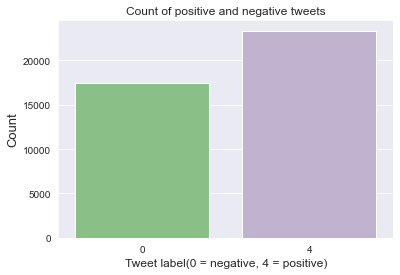

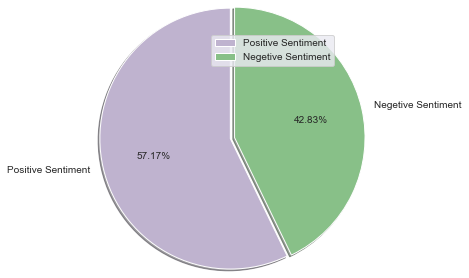

Text(0.5, 0, 'Number of Characters')

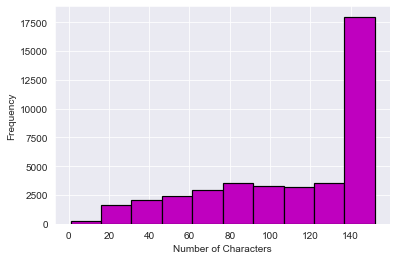

In [36]:
#tweet counts- positive and negative tweets

tweet_count_elon  = elon_tweets['sentiment score'].value_counts()
print(tweet_count_elon)

#bar plot of positive and negative tweets

plt.figure(figsize=(6,4))
sns.barplot(tweet_count_elon.index, tweet_count_elon.values, palette = 'Accent')
sns.set_style("darkgrid")
plt.title('Count of positive and negative tweets')
plt.ylabel('Count', fontsize=13)
plt.xlabel('Tweet label(0 = negative, 4 = positive)', fontsize=12)
plt.show()

#pie chart showing percentage of positive and negative tweets

sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(elon_tweets['sentiment score'] != 0).sum(), (elon_tweets['sentiment score'] == 0).sum()] 
colors = ['#bfb3cf', '#88c088']
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.05), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

#checking the distribution of length of tweets in the data

length_elon_tweets = elon_tweets['tweet'].str.len().plot.hist(color = 'm', figsize = (6, 4), edgecolor='black', linewidth=1.2)
plt.xlabel('Number of Characters')


In [107]:
sentiment_score_list = pd.DataFrame(elon_tweets, columns = ['status_id', 'sentiment score'])
sentiment_score_list.head()

,status_id,sentiment score
0,1000021217993285632,4
1,1000047804796977153,4
2,1000049585266528256,4
3,1000320595421290500,0
4,1000371401931608066,4


In [114]:
sentiment_score_list_dict = sentiment_score_list.set_index('status_id').T.to_dict('list')

In [ ]:
qmarks = ', '.join('?' * len(sentiment_score_list))
qry = "Insert Into Table proj_stats(sentiment_score) VALUES (%s) where status_id = (%s)" 
cur_new.executemany(qry, sentiment_score_list_dict.keys(),sentiment_score_list.values())
connection_new.commit()

In [146]:
import pymysql.cursors

# Connect to the database
connection_dict = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='EMSE6992',
                             password='MySQLpass')
cur_dict = connection_dict.cursor()

In [126]:
for key, value in sentiment_score_list_dict.items():
    
    sql = "UPDATE proj_stats SET sentiment_score = (%s) WHERE status_id = (%s)"
    val = (value, key)
    cur_dict.execute(sql,val)
connection_dict.commit()

In [131]:
sql = "Select * From proj_stats "
cur_dict.execute(sql)

users11 = cur_dict.fetchall()
elon_tweets11 = pd.DataFrame.from_dict(users11)
elon_tweets11.columns = ['created_date', 'favorites_count', 'status_id', 'lang', 'retweet_count', 'source', 'tweet', 'truncated', 'user_id', 'sentiment_score']

elon_tweets11[:5]

,created_date,favorites_count,status_id,lang,retweet_count,source,tweet,truncated,user_id,sentiment_score
0,2018-05-25,113,1000021217993285632,en,4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Love this. https://t.co/ECYyqFbNTk,NaN,64488804,4
1,2018-05-25,1830,1000047804796977153,en,694,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Releasing Gym Retro — 1000+ games for reinforc...,1.0,4398626122,4
2,2018-05-25,0,1000049585266528256,en,20,"<a href=""http://twitter.com/download/android"" ...",RT @Fermilab: The Secret to Measuring an Antin...,NaN,49310901,4
3,2018-05-26,8,1000320595421290500,en,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I don't think this is supposed to happen @firs...,NaN,19159176,0
4,2018-05-26,18,1000371401931608066,en,1,"<a href=""http://twitter.com/download/iphone"" r...",Congrats to all the teams! https://t.co/GXprl0...,NaN,1024391197,4


In [134]:
#Set of unique users who have retweeted a statuses made by 'elonmusk'

result1 = cur_dict.execute("select distinct user_id from proj_stats where text like 'RT @elonmusk%'")

unique_users_retweet_sql = cur_dict.fetchall()

print(len(unique_users_retweet_sql))

37


In [135]:
# number of unique users

result2 = cur_dict.execute("select distinct user_id from proj_stats")
all_users_sql = cur_dict.fetchall()

print(len(all_users_sql))

192


In [147]:
# number of tweets with positive sentiments

result3 = cur_dict.execute("SELECT COUNT(ALL status_id) FROM proj_stats WHERE sentiment_score = '4'")
positive_sentiments = cur_dict.fetchall()

print((positive_sentiments))

((23364,),)


In [148]:
# number of tweets with Negative sentiments

result4 = cur_dict.execute("SELECT COUNT(ALL status_id) FROM proj_stats WHERE sentiment_score = '0'")
negative_sentiments = cur_dict.fetchall()

print((negative_sentiments))

((17501,),)


In [140]:
#Summation of the Favourite counts of tweets with Negative Sentiment

result5 = cur_dict.execute("SELECT SUM(favorites_count) from proj_stats where sentiment_score = '0'")
negative_sentiments_favourites_count = cur_dict.fetchall()

print((negative_sentiments_favourites_count))

((Decimal('55182905'),),)


In [144]:
#Summation of the Favourite counts of tweets with Positive Sentiment

result6 = cur_dict.execute("SELECT SUM(favorites_count) from proj_stats where sentiment_score = '4'")
positive_sentiments_favourites_count = cur_dict.fetchall()

print((positive_sentiments_favourites_count))


((Decimal('34318849'),),)
